In [3]:
from pandas import Series, DataFrame
import pandas as pd
import re
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---
The exam is set up as follows:
* Q1 has 4 parts, of 3 points each
* Q2-Q9: 4 points each
* Q10-Q13: 7 points each
* Q14-Q15: 9 points each
* Q16: 10 points

The exam is open-book, open-notes, open-Google. You have 3 hours. Best of luck!

---
## Question 1

![splotches](splotches.png)

Consider the above classification problem. For each question below, answer using a percentage or a fraction, and give a brief justification. You may assume that each blob has the same number of points.

### [Q1a 3 points] What accuracy can a logistic regression classifier achieve?

### [Q1b 3 points] What is the accuracy of a decision tree with max_depth=1?

Recall that a depth-1 decision tree looks like this:
![depth1](depth1.png)

### [Q1c 3 points] Best extension to depth-2 tree.
Suppose you could extend the max_depth=1 tree you built above by an extra level to build a max_depth=2 tree. For example, your new tree can look like one of the following, with "Condition 1" being the same as the "Condition" in the tree you built for question (b).

<table border=0 padding=0><tr><td> ![depth2a](depth2a.png) </td><td> or </td><td> ![depth2b](depth2b.png) </td></tr></table>

What is the best accuracy you can get?

### [Q1d 3 points] What is the best accuracy possible using a max_depth=2 decision tree?

You are allowed to use any settings for Conditions 1, 2, and 3.

---

We will analyze a dataset about political consultants and the clients they work for. Each row records the particulars of one particular consultant working for one client in one reporting period. Here, we will describe some of the important columns:
* **Reporting Period, Year, and Filing Date**: Political consultants must file records about the people they work for in every reporting period, e.g., July 1 - December 31. The year is self-explanatory. The "Filing Date" records the date on which the report was filed.
* **Filing Type, Correction Type**: This specifies the kind of report being filed. If the Filing Type was CORRECTION, the Correction Type is noted.
* **Political Consultant (PC) Name, PC Business Name**: The name of the dude doing the work, and the consulting company that he or she works for.
* **Client Name, Client Type**: The name of the person or entity for whom the consultant is working, and the type of person or entity, e.g., "public official".
* **Office Held/Sought**: The particulars of the public office that the client currently holds, or hopes to contest.
* **Description of Services Provided**: What exactly is the consultant doing for the client?

In [38]:
cons_df = pd.read_csv('consultant.csv',parse_dates=['Filing Date','Reporting Period'])
cons_df.describe()

,Year,Reporting Period ID
count,4636.000000,4636.000000
mean,2017.069456,1.551984
std,0.616500,0.497344
min,2016.000000,1.000000
25%,2017.000000,1.000000
50%,2017.000000,2.000000
75%,2017.000000,2.000000
max,2018.000000,2.000000


In [39]:
cons_df.dtypes

Year                                                             int64
Reporting Period                                                object
Filing Date                                             datetime64[ns]
Filing Record Identifier                                        object
Filing Type                                                     object
Correction Type                                                 object
Political Consultant (PC) Name                                  object
PC Business Name                                                object
PC Business Address 1                                           object
PC Business City                                                object
PC Business State                                               object
PC Business Zip Code                                            object
PC Business County                                              object
PC Business Country                                             object
PC Bus

In [40]:
cons_df.head(10)

,Year,Reporting Period,Filing Date,Filing Record Identifier,Filing Type,Correction Type,Political Consultant (PC) Name,PC Business Name,PC Business Address 1,PC Business City,...,Client Business Address 1,Client Business City,Client Business State,Client Business Zip Code,Client Business Country,Client Business Telephone Number,Name of Person with Controlling Interest in Business,Description of Services Provided,Registration ID,Reporting Period ID
0,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,5030 BROADWAY,NEW YORK,NEW YORK,10034,UNITED STATES,212-304-0200,NaN,DIRECT VOTER CONTACT - MAIL AND MEDIA,PC-201701241000002,2
1,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,PO BOX 833,NANUET,NEW YORK,10954,UNITED STATES,845-708-5815,NaN,TV COMMERCIAL,PC-201701241000002,2
2,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,721 VINCENT AVE,BRONX,NEW YORK,10465,UNITED STATES,347-281-9759,NaN,DIRECT MAIL,PC-201701241000002,2
3,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,452 FORTH WASHINGTON AVE APT 46,NEW YORK,NEW YORK,10033,UNITED STATES,646-200-2101,NaN,DIRECT MAIL,PC-201701241000002,2
4,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,2440 97TH ST,EAST ELMHURST,NEW YORK,11369,UNITED STATES,917-251-7005,NaN,COMPLIANCE,PC-201701241000002,2
5,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,5030 BROADWAY SUITE 810,NEW YORK,NEW YORK,10034,UNITED STATES,212-740-6100,NaN,COMPLIANCE,PC-201701241000002,2
6,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,2018 WLLIAMSBRIDGE RD,BRONX,NEW YORK,10461,UNITED STATES,718-684-2074,NaN,DIRECT MAIL,PC-201701241000002,2
7,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,220 36TH ST STE 2A,BROOKLYN,NEW YORK,11232,UNITED STATES,718-965-6450,"KIMBALL, ANDREW",STRATEGIC COUNSEL- NYC COUNCIL,PC-201701241000002,2
8,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,220 36TH ST STE 2A,BROOKLYN,NEW YORK,11232,UNITED STATES,718-965-6450,"KIMBALL, ANDREW",STRATEGIC COUNSEL- NYC COUNCIL,PC-201701241000002,2
9,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,225 WILLOW AVE,BRONX,NEW YORK,10454,UNITED STATES,718-292-6400,"SEGAL, AARON",STRATEGIC COUNSEL (BUDGET) - NYC COUNCIL AND C...,PC-201701241000002,2


## [Q2 4 points] What are the different types of "Filing Type"?

In [41]:
cons_df['Filing Type'].unique()

array(['PUBLIC DISCLOSURE', 'CORRECTION'], dtype=object)

In [42]:
cons_df['Filing Type'].value_counts()

PUBLIC DISCLOSURE    3994
CORRECTION            642
Name: Filing Type, dtype: int64

## [Q3 4 points] Among the rows where "Filing Type" equals CORRECTION, what fraction have a valid "Correction Type"?

The Correction Type entry is valid if it is not missing.

In [43]:
sum(cons_df[cons_df['Filing Type'] == 'CORRECTION']['Correction Type'].notnull())/len(cons_df[cons_df['Filing Type'] == 'CORRECTION']['Correction Type'])

0.11214953271028037

## [Q4 4 points] Is it true that whenever "Correction Type" has valid (non-missing) entries, then the "Filing Type" is CORRECTION?

In [44]:
cons_df[(cons_df['Correction Type'].notnull())]['Filing Type'].value_counts()


CORRECTION    72
Name: Filing Type, dtype: int64

It is correct!

### [Q5 4 points] Convert the DataFrame into a time series with Filing Date as the index.

Make sure the index is of type "datetime" and not "string". Also remember to sort the dates.

In [47]:
cons_df.set_index('Filing Date').sort_index(inplace=True)
cons_df.loc[0:10]

,Year,Reporting Period,Filing Date,Filing Record Identifier,Filing Type,Correction Type,Political Consultant (PC) Name,PC Business Name,PC Business Address 1,PC Business City,...,Client Business Address 1,Client Business City,Client Business State,Client Business Zip Code,Client Business Country,Client Business Telephone Number,Name of Person with Controlling Interest in Business,Description of Services Provided,Registration ID,Reporting Period ID
0,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,5030 BROADWAY,NEW YORK,NEW YORK,10034,UNITED STATES,212-304-0200,NaN,DIRECT VOTER CONTACT - MAIL AND MEDIA,PC-201701241000002,2
1,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,PO BOX 833,NANUET,NEW YORK,10954,UNITED STATES,845-708-5815,NaN,TV COMMERCIAL,PC-201701241000002,2
2,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,721 VINCENT AVE,BRONX,NEW YORK,10465,UNITED STATES,347-281-9759,NaN,DIRECT MAIL,PC-201701241000002,2
3,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,452 FORTH WASHINGTON AVE APT 46,NEW YORK,NEW YORK,10033,UNITED STATES,646-200-2101,NaN,DIRECT MAIL,PC-201701241000002,2
4,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,2440 97TH ST,EAST ELMHURST,NEW YORK,11369,UNITED STATES,917-251-7005,NaN,COMPLIANCE,PC-201701241000002,2
5,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,5030 BROADWAY SUITE 810,NEW YORK,NEW YORK,10034,UNITED STATES,212-740-6100,NaN,COMPLIANCE,PC-201701241000002,2
6,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,2018 WLLIAMSBRIDGE RD,BRONX,NEW YORK,10461,UNITED STATES,718-684-2074,NaN,DIRECT MAIL,PC-201701241000002,2
7,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,220 36TH ST STE 2A,BROOKLYN,NEW YORK,11232,UNITED STATES,718-965-6450,"KIMBALL, ANDREW",STRATEGIC COUNSEL- NYC COUNCIL,PC-201701241000002,2
8,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,220 36TH ST STE 2A,BROOKLYN,NEW YORK,11232,UNITED STATES,718-965-6450,"KIMBALL, ANDREW",STRATEGIC COUNSEL- NYC COUNCIL,PC-201701241000002,2
9,2016,JULY 1 - DECEMBER 31,2017-02-03,PCF-201701241000002,PUBLIC DISCLOSURE,NaN,"MIRANDA, LUIS A JR",MIRRAM GROUP LLC,215 PARK AVE SOUTH 15TH FL,NEW YORK,...,225 WILLOW AVE,BRONX,NEW YORK,10454,UNITED STATES,718-292-6400,"SEGAL, AARON",STRATEGIC COUNSEL (BUDGET) - NYC COUNCIL AND C...,PC-201701241000002,2


## [Q6 4 points] When the "Client Type" is "PUBLIC OFFICIAL/CANDIDATE", who are the top 10 most frequently mentioned clients ("Client Name")?

In [53]:
cons_df[cons_df['Client Type'] =='PUBLIC OFFICIAL/CANDIDATE']['Client Name'].value_counts()[0:10]

LANDER, BRAD           43
DE BLASIO, BILL        39
POWERS, KEITH          33
DOYLE, JOHN            32
VAN BRAMER, JIMMY      28
SINGAS, MADELINE       28
KALLOS, BEN            28
WALTER, RUTH           28
SILVER, MARY           28
CURRAN, LAURA          28
Name: Client Name, dtype: int64

## [Q7 4 points] Which 5 political offices ("Office Held/Sought") attract the most number of clients ("Client Name")?

In [68]:
cons_df.drop_duplicates(['Office Held/Sought','Client Name']).groupby(['Office Held/Sought'])['Client Name'].agg(['count'])\
.reset_index().sort_values('count',ascending=False)[0:5]

,Office Held/Sought,count
80,NYC COUNCIL,37
73,NY SENATE,16
15,CITY COUNCIL,10
136,SENATOR,8
16,CITY COUNCIL,8


## [Q8 4 points] "PAID COMMUNICATIONS" and "FIELD SERVICES".

Under "Description of Services Provided", you will find many strings containing the words "PAID COMMUNICATIONS" and also the words "FIELD SERVICES". Find all the different ways in which these services are described.
* For example, you may find "PAID COMMUNICATIONS & FIELD SERVICES" and "PAID COMMUNICATIONS AND FIELD SERVICES".
* What other variants are there?
* NOTE: There are descriptions called just "PAID COMMUNICATIONS", that don't include "FIELD SERVICES." We are not talking about these.

In [131]:
cons_df['List'] = cons_df['Description of Services Provided'].str.extract(r'PAID COMMUNICATIONS(.*)FIELD SERVICES',expand=True)

In [132]:
cons_df['Description of Services Provided'][cons_df['List'].notnull()].unique()

array(['PAID COMMUNICATIONS AND FIELD SERVICES ',
       'PAID COMMUNICATIONS AND FIELD SERVICES',
       'PAID COMMUNICATIONS AND FIELD SERVICES.  ',
       'PAID COMMUNICATIONS AND FIELD SERVICES.',
       'PAID COMMUNICATIONS AND FIELD SERVICES. ',
       'PAID COMMUNICATIONS & FIELD SERVICES',
       'PAID COMMUNICATIONS & FIELD SERVICES. ',
       'PAID COMMUNICATIONS & FIELD SERVICES ',
       'PAID COMMUNICATIONS & FIELD SERVICES.'], dtype=object)

## [Q9 4 points] Who uses the most different consultant companies?

A candidate can have many different political consultants, but they may be from the same company. For each "Client Name" whose "Client Type" is "PUBLIC OFFICIAL/CANDIDATE", find out the number of unique consulting companies ("PC Business Name") with whom he or she has engaged. Print out the top 10 client names who have engaged with the most consulting companies.

In [141]:
cons_df[cons_df['Client Type'] == 'PUBLIC OFFICIAL/CANDIDATE'].groupby(['Client Name'])['PC Business Name'].agg('nunique').sort_values(ascending=False)[0:10]

Client Name
GONZALEZ, ERIC                  7
ALCANTARA, MARISOL              6
DE LA ROSA, CARMEN              5
KLEIN, JEFFREY D                5
KAMINSKY, TODD                  4
LANDER, BRAD                    4
AVELLA, TONY                    4
CARLUCCI, DAVID                 4
GJONAJ, MARK                    4
FERRERAS-COPELAND, JULISSA      4
Name: PC Business Name, dtype: int64

## [Q10 7 points] Plot the top 10  "Description of Services Provided", after cleaning up these descriptions.

As we saw with "PAID COMMUNICATIONS" and , there are many ways of saying the same thing. So, we will try to come up with canonical descriptions.

For each string under "Description of Services Provided", do the following steps (in this particular order):
* Remove any spaces from the beginning of the string
* Remove any spaces at the end of the string
* Remove any full-stop ('.') at the end of the string

Store these cleaned description in a new column called "Cleaned Descriptions", and plot the top 10 most frequent "Cleaned Descriptions".

In [144]:
cons_df['Cleaned Descriptions'] = cons_df['Description of Services Provided'].str.lstrip().str.rstrip().str.rstrip('.')

<AxesSubplot:>

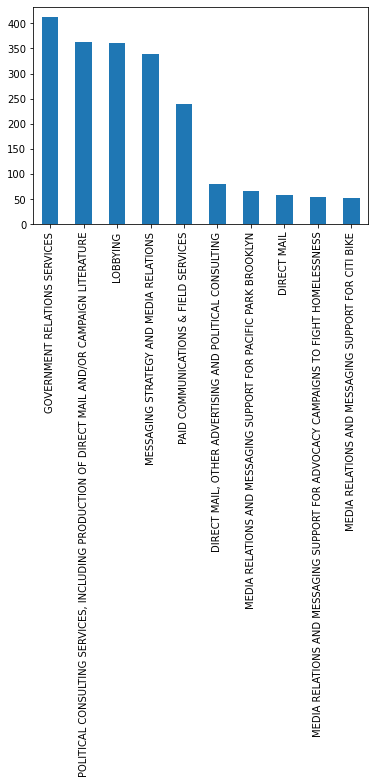

In [148]:
cons_df['Cleaned Descriptions'].value_counts()[0:10].plot(kind='bar')

## [Q11 7 points] Plot the number of filings for each month in the dataset.

The x-axis should go from Jan 2017 to July 2018. Use the "Filing Date" as the date of filing.

<AxesSubplot:xlabel='Filing Date'>

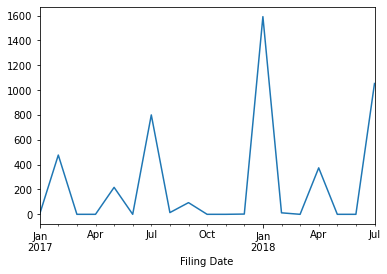

In [185]:
cons_df.index = cons_df['Filing Date']
cons_df.sort_index(inplace=True)
cons_df.groupby(pd.Grouper(freq = 'M'))['Filing Record Identifier'].agg('count').plot()

<AxesSubplot:xlabel='Filing Date'>

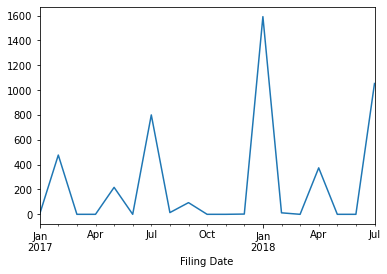

In [186]:
cons_df['Filing Date'].resample('M',kind='period').count().plot()

In [175]:
cons_df['Filing Record Identifier'].nunique()

119

## [Q12 7 points] What are the programs where consultants help with media relations and messaging support?

In the "Cleaned Descriptions", you will find several strings of the form "MEDIA RELATIONS AND MESSAGING SUPPORT". Each such string lists the "program" which is getting the support. For example:
* MEDIA RELATIONS AND MESSAGING SUPPORT FOR PACIFIC PARK BROOKLYN
    * The program is "FOR PACIFIC PARK BROOKLYN"
* MEDIA RELATIONS AND MESSAGING SUPPORT FOR LINKNYC
    * The program is "FOR LINKNYC"
* MEDIA RELATIONS AND MESSAGING SUPPORT AROUND FREELANCER ISSUES
    * The program is "AROUND FREELANCER ISSUES"

Print out all the unique programs getting such public relations support.

**NOTE**: If you were unable to compute the Cleaned Descriptions in Q10, just say so in a comment, and use
> df['Cleaned Descriptions'] = df['Description of Services Provided']

In [241]:
cons_df['Program'] = cons_df['Cleaned Descriptions'].str.extract(r'MEDIA RELATIONS AND MESSAGING SUPPORT (.*)')

In [242]:
set(cons_df['Program'][cons_df['Program'].notnull()])

{'AROUND FREELANCER ISSUES',
 'AROUND FREELANCER ISSUES, INCLUDING NONPAYMENT PROTECTION',
 'FOR ADVOCACY CAMPAIGNS TO FIGHT HOMELESSNESS',
 'FOR CITI BIKE',
 'FOR CRIMINAL JUSTICE REFORM EFFORTS IN NY',
 'FOR LIBRARY REDEVELOPMENT',
 'FOR LINKNYC',
 'FOR PACIFIC PARK BROOKLYN',
 'FOR PARK BROOKLYN',
 'FOR SEVERAL NON-PROFIT PROGRAMS  AND PROJECTS, AND ADVOCACY FOR PEOPLE WITH HIV/AIDS',
 'FOR SEVERAL NON-PROFIT PROGRAMS AND ADVOCACY FOR PEOPLE WITH HIV/AIDS',
 'FOR SEVERAL NON-PROFIT PROGRAMS AND PROJECTS',
 'FOR SEVERAL NON-PROFIT PROGRAMS AND PROJECTS AND ADVOCACY FOR PEOPLE WITH HIV/AIDS',
 'FOR SEVERAL NON-PROFIT PROGRAMS AND PROJECTS, AND ADVOCACY FOR PEOPLE WITH HIV/AIDS',
 'FOR SEVERAL NON-PROFIT PROGRAMS, PROJECTS AND ADVOCACY FOR PEOPLE WITH HIV/AIDS',
 'FOR THE LIBRARY REDEVELOPMENT'}

### [Q13 7 points] Unique senate districts.

Consider all "Office Held/Sought" fields of the form "NYS SENATE *blah* DISTRICT". Extract the district identifier (*blah*) and figure out the number of unique districts represented in the data. For example:
* "NYS SENATE 31ST DISTRICT" $\Rightarrow$ district identifier is "31ST"

In [243]:
cons_df['Office Held/Sought']

Filing Date
2017-01-31                         NaN
2017-01-31                NYS ASSEMBLY
2017-02-01    NEW YORK STATE ASSEMBLY 
2017-02-01       NEW YORK STATE SENATE
2017-02-01     NEW YORK STATE ASSEMBLY
                        ...           
2018-07-27                         NaN
2018-07-27                         NaN
2018-07-27                         NaN
2018-07-27                         NaN
2018-07-27                         NaN
Name: Office Held/Sought, Length: 4636, dtype: object

In [244]:
cons_df['District'] = cons_df['Office Held/Sought'].str.extract(r'NYS SENATE (.*) DISTRICT')

In [246]:
cons_df['District'][cons_df['District'].notnull()].unique()

array(['31ST', '18TH', '36TH', '11TH', '34TH', '38TH', '', '23RD', '13TH',
       '53RD', '80TH', '20TH'], dtype=object)

In [249]:
cons_df['District'][(cons_df['District'].notnull()) & (cons_df['District'] != '')].nunique()

11

### [Q14 9 points] Find clients who hire multiple consultant firms for the same job.

For each pair of "Client Name" and "Cleaned Descriptions", figure out the number of unique "PC Business Names" who have done work of that description for that client. List the clients who had 4 or more PC Businesses work on some "Cleaned Description."
For example:
* If client BILL BLASIO had 3 consulting firms for "DIRECT VOTER CONTACT", 2 firms for "DIRECT MAIL" and 5 firms for "PAID COMMUNICATIONS", we want to list BILL BLASIO in the output since "PAID COMMUNICATIONS" had 5 firms.
* If client ERIC GONZALEZ had 3 firms for "DIRECT VOTER CONTACT" and 3 firms for "DIRECT MAIL", we won't output ERIC GONZALEZ since all Cleaned Descriptions had fewer than 4 associated firms.

In [268]:
cons_df_summ = cons_df.groupby(['Client Name','Cleaned Descriptions'])['PC Business Name'].agg(['nunique'])
cons_df_summ[cons_df_summ['nunique'] >= 4].reset_index()

,Client Name,Cleaned Descriptions,nunique
0,ARCHDIOCESE OF NEW YORK,"MEDIA RELATIONS, CREATIVE DESIGN SERVICES SUPPORT",4
1,"LANDER, BRAD","POLITICAL CONSULTING SERVICES, INCLUDING PRODU...",4
2,"MOTIVATE INTERNATIONAL, INC (CITIBIKE)",MEDIA RELATIONS AND MESSAGING SUPPORT FOR CITI...,4
3,PROFESSIONAL STAFF CONGRESS,MESSAGING STRATEGY AND MEDIA RELATIONS IN SUPP...,4


## [Q15 9 points] Busy seasons

For each "Political Consultant (PC) Name", do the following:
* Figure out the number of unique Client Names associated with this Political Consultant (PC) Name in each Reporting Period.
* Find the Reporting Period when he/she had the most unique Client Names. Call this the "busy season" for this particular Political Consultant.

Now, for each Reporting Period, figure out how many Political Consultant (PC) Names call it their busy season.

Note: A Political Consultant may do multiple jobs for a given Client in each Reporting Period.

In [278]:
cons_df_summ2 = cons_df.groupby(['Political Consultant (PC) Name','Reporting Period'])['Client Name'].agg(['nunique']).reset_index()
cons_df_summ2

,Political Consultant (PC) Name,Reporting Period,nunique
0,"ARZT, GEORGE D",JANUARY 1 - JUNE 30,25
1,"ARZT, GEORGE D",JULY 1 - DECEMBER 31,32
2,"AUSTRIE, SASHA",JULY 1 - DECEMBER 31,33
3,"BERLIN, VALERIE",JANUARY 1 - JUNE 30,85
4,"BERLIN, VALERIE",JULY 1 - DECEMBER 31,79
...,...,...,...
85,"TULLY, ALEXANDRA",JANUARY 1 - JUNE 30,8
86,"TULLY, ALEXANDRA",JULY 1 - DECEMBER 31,6
87,"WILLMORE, BRANDON",JANUARY 1 - JUNE 30,49
88,"YONCHAK, ERIN",JANUARY 1 - JUNE 30,49


In [290]:
cons_df_summ2['Max nunique'] = cons_df_summ2.groupby(['Political Consultant (PC) Name'])['nunique'].transform(max)
cons_df_summ2

,Political Consultant (PC) Name,Reporting Period,nunique,Max nunique
0,"ARZT, GEORGE D",JANUARY 1 - JUNE 30,25,32
1,"ARZT, GEORGE D",JULY 1 - DECEMBER 31,32,32
2,"AUSTRIE, SASHA",JULY 1 - DECEMBER 31,33,33
3,"BERLIN, VALERIE",JANUARY 1 - JUNE 30,85,85
4,"BERLIN, VALERIE",JULY 1 - DECEMBER 31,79,85
...,...,...,...,...
85,"TULLY, ALEXANDRA",JANUARY 1 - JUNE 30,8,8
86,"TULLY, ALEXANDRA",JULY 1 - DECEMBER 31,6,8
87,"WILLMORE, BRANDON",JANUARY 1 - JUNE 30,49,49
88,"YONCHAK, ERIN",JANUARY 1 - JUNE 30,49,56


In [299]:
cons_df_summ3 = cons_df_summ2[cons_df_summ2['nunique'] == cons_df_summ2['Max nunique']].drop_duplicates(['Political Consultant (PC) Name'])
cons_df_summ3.shape

(58, 4)

In [300]:
cons_df_summ3['Reporting Period'].value_counts()

JULY 1 - DECEMBER 31    31
JANUARY 1 - JUNE 30     27
Name: Reporting Period, dtype: int64

### [Q16 10 points] Connections between public officials and businesses

Let's say a politician P and a business B are *connected* if there is a consultant firm C that is consulting for both P and B. If there is only one such consulting firm, the "strength" of the connection is 1. If there are two different consulting firms consulting for both P and B, the strength of the connection between P and B is 2, and so on. If the same consultant firm is linked to P and B in two different "Reporting Periods", that still counts as 1 when computing connection strength between P and B.

Find the public official and the business with the strongest connection.

Note: A politician has "Client Type" as "PUBLIC OFFICIAL/CANDIDATE", while every other "Client Type" is a business. The consultant firm is specified by "PC Business Name".

In [359]:
politician_df = cons_df[['Client Name','PC Business Name']][cons_df['Client Type'] == 'PUBLIC OFFICIAL/CANDIDATE']
politician_df.drop_duplicates(inplace=True)

business_df = cons_df[['Client Name','PC Business Name']][cons_df['Client Type'] != 'PUBLIC OFFICIAL/CANDIDATE']
business_df.drop_duplicates(inplace=True)



In [363]:
politician_df=politician_df.reset_index(drop=True)
business_df=business_df.reset_index(drop=True)


In [368]:
politician_df.columns = ['Politician Name',politician_df.columns[1]]
business_df.columns = ['Business Name',business_df.columns[1]]

In [376]:
connection_df = politician_df.dropna().merge(business_df.dropna(),how='outer', on = 'PC Business Name')

In [381]:
connection_df2 = connection_df.groupby(['Politician Name','Business Name'])['PC Business Name'].agg(['nunique']).reset_index()
connection_df2

,Politician Name,Business Name,nunique
0,"ABREU, RANDY",FRIENDS OF THE BQX,1
1,"ABREU, RANDY",LONG TERM CARE ADVOCACY PROJECT,1
2,"ABREU, RANDY",NATIONAL INSTITUTE FOR REPRODUCTIVE HEALTH ACT...,1
3,"ABREU, RANDY",NY ACLU (AMERICAN CIVIL LIBERTIES UNION),1
4,"ABREU, RANDY",PLANNED PARENTHOOD EMPIRE STATE ACTS (ACTION F...,1
...,...,...,...
10178,"WLILIAMS, JUMAANE",WEST VILLAGE HOUSING DEVELOPMENT FUND,1
10179,"WLILIAMS, JUMAANE",WOMEN'S HOUSING AND ECONOMIC DEVELOPMENT CORP...,1
10180,"WLILIAMS, JUMAANE",WOMEN'S HOUSING AND ECONOMIC DEVELOPMENT CORPO...,1
10181,"WLILIAMS, JUMAANE",WOMEN'S HOUSING AND ECONOMIC DEVELPOMENT CORPO...,1


In [384]:
connection_df2.pivot_table(index='Politician Name', columns='Business Name',values='nunique',fill_value=0)

Business Name,1-10 BUSH TERMINAL OWNER LP,1-10 BUSH TERMINAL OWNER LP & 19-20 BUSH TERMINAL OWNER LP,1-10 BUSH TERMINAL OWNERS LP,10 W 17TH PROPERTY LLC,"1199 SEIU LABOR MANAGEMENT INITIATIVES, INC. HEALTHCARE EDUCATION PROJECT",1199 SEIU UNITED HEALTHCARE WORKERS EAST,138 WILLOUGHBY LLC,160 EAST 125TH OWNER LLC,160 EAT 125TH OWNER LLC,166 EAST 100 OWNER LLC,...,WOMEN'S HOUSING AND ECONOMIC DEVELOPMENT CORPORATION,WOMEN'S HOUSING AND ECONOMIC DEVELOPMENT CORPORATION,WOMEN'S HOUSING AND ECONOMIC DEVELPOMENT CORPORATION,WORKING FAMILIES PARTY,YANKEE CLIPPER FOOD SERVICE,YESHIVA UNIVERSITY,YWA - AMSTERDAM,YWA- AMSTERDAM LLC,YWA-AMSTERDAM,YWA-AMSTERDAM LLC
Politician Name,,,,,,,,,,,,,,,,,,,,,
"ABREU, RANDY",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ADAMS, ADRIENNE",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ADDABBO, JOSEPH",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ALCANTARA, MARISOL",2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,3,2,1,1,2
"AMEDORE, GEORGE A",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WALSH, BEN",0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"WALTER, RUTH",0,0,0,0,0,0,0,0,0,0,...,1,3,1,1,0,0,0,0,0,0
"WILLIAMS, JUMAANE",0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,0,0,0,0,0,0


In [386]:
connection_df2.loc[connection_df2['nunique'].idxmax()]

Politician Name         GONZALEZ, ERIC  
Business Name      82ND STREET ACADEMICS
nunique                                5
Name: 3985, dtype: object